<a href="https://colab.research.google.com/github/jdvalmart/aprendizaje-no-supervisado/blob/main/Laboratorio_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import cifar10

In [ ]:
# Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# Reorganizar los datos
X_train_flat = X_train.reshape(X_train.shape[0], -1)
print(f"dimensión de X_train despues de aplanar: {X_train_flat.shape}")

dimensión de X_train despues de aplanar: (50000, 3072)


In [ ]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_flat)

KMeans(n_clusters=10, random_state=42)

In [ ]:
clusters = kmeans.labels_

In [ ]:
unique,counts = np.unique(clusters,return_counts=True)
print("Ditribución de las imágenes en los clusters:", dict(zip(unique, counts)))

Ditribución de las imágenes en los clusters: {np.int32(0): np.int64(2741), np.int32(1): np.int64(4900), np.int32(2): np.int64(7125), np.int32(3): np.int64(4162), np.int32(4): np.int64(5814), np.int32(5): np.int64(4484), np.int32(6): np.int64(3616), np.int32(7): np.int64(5074), np.int32(8): np.int64(6729), np.int32(9): np.int64(5355)}


In [ ]:
# Visualizar los clusters
def plot_images(images, titles, rows, cols):
  fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(titles[i])
    ax.axis('off')
  plt.show()


In [ ]:
sample_images = []
sample_titles = []
for i in range(10):
  idx = np.where(clusters == i)[0][:5]
  sample_images.extend(X_train[idx])
  sample_titles.extend([f"Cluster {i}"] * 5)

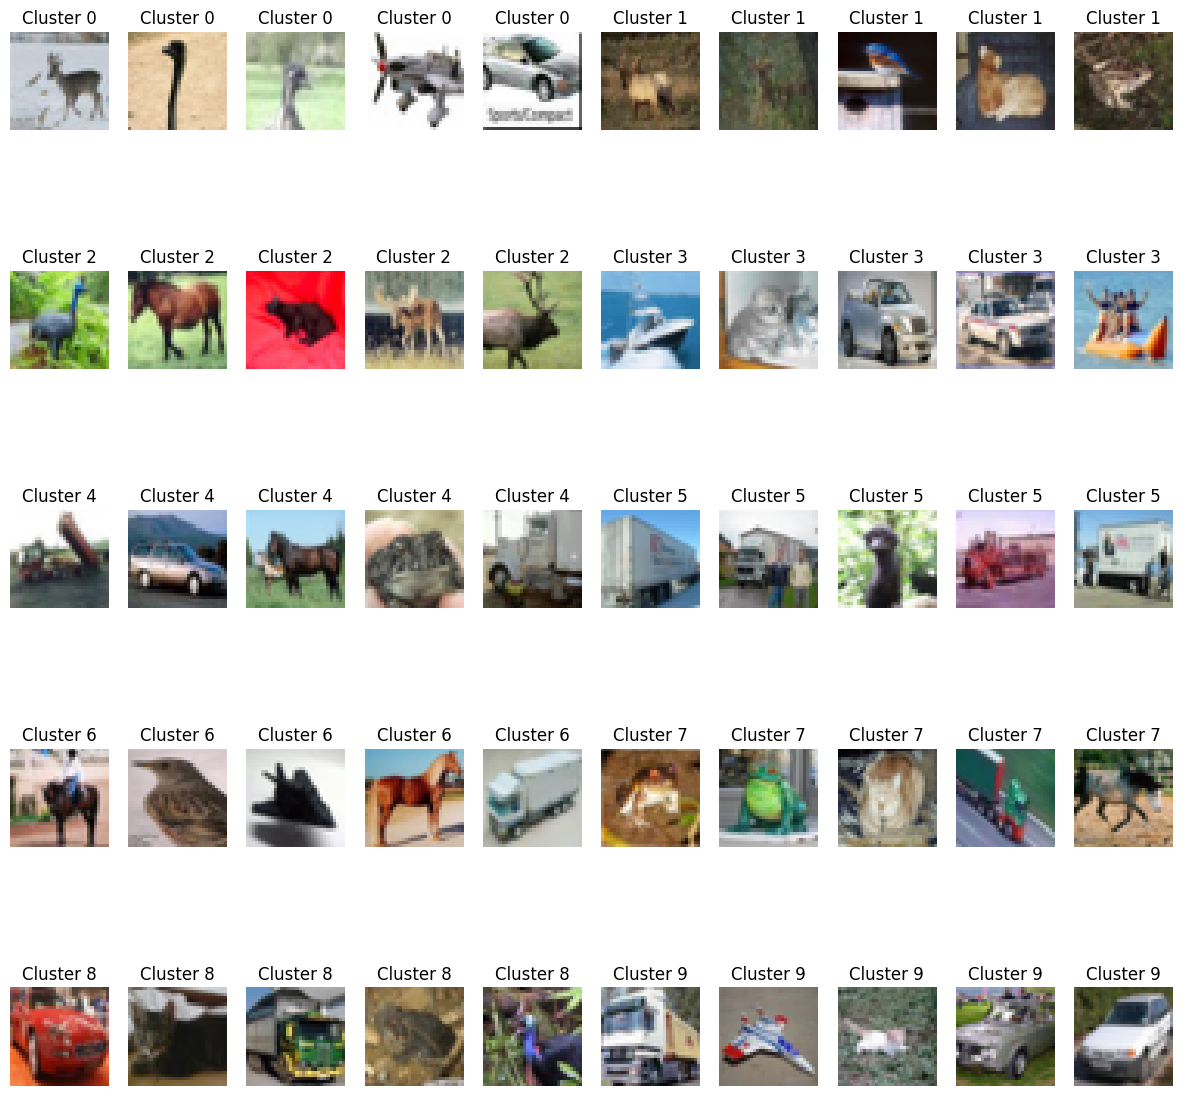

In [ ]:
plot_images(sample_images, sample_titles, rows=5, cols=10)

In [ ]:
# Reducir dimensionalidad con PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_train_flat)

In [ ]:
print(f"dimensión de X_train despues de aplicar PCA: {X_pca.shape}")

dimensión de X_train despues de aplicar PCA: (50000, 50)


In [ ]:
# Visualización con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

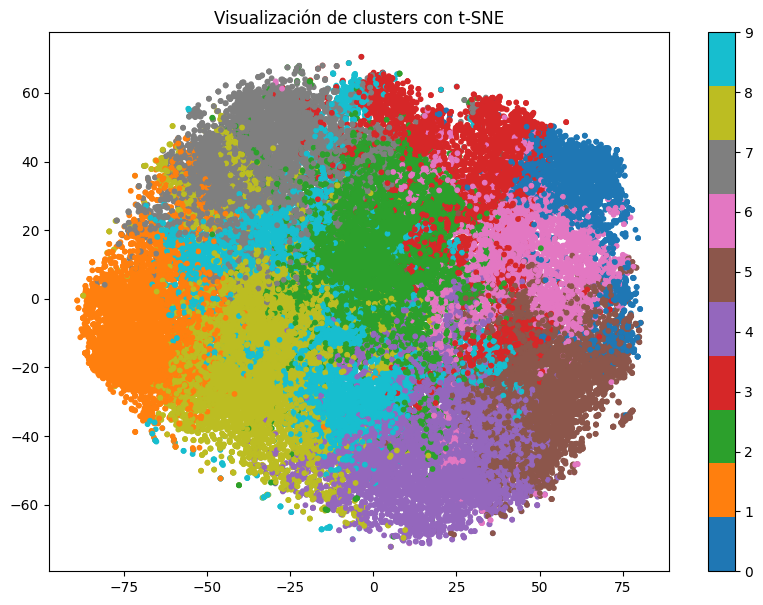

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='tab10', s=10)
plt.title('Visualización de clusters con t-SNE')
plt.colorbar()
plt.show()




